In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Attention
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import time
import numpy as np
import time
import string
import math
import matplotlib
import pickle

In [0]:
def create_model(input_dim, output_dim, lr, lr_decay, mom):
    model = Sequential()
    model.add(Dense(500, activation = 'relu', input_dim = input_dim))
    model.add(Dropout(0.1))
    # model.add(Embedding(28, output_dim = 256))
    # model.add(LSTM(128))
    model.add(Dense(300, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(250, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(output_dim, activation = 'sigmoid'))

    sgd = SGD(lr = lr, decay = lr_decay, momentum = mom)
    model.compile(loss = 'binary_crossentropy', optimizer = sgd)

    return model

In [0]:
from google.colab import files
train_features = files.upload()
train_labels = files.upload()

Saving train_features_continuous.npy to train_features_continuous.npy


Saving train_labels_continuous.npy to train_labels_continuous.npy


In [0]:
X = np.load("train_features_continuous.npy")
y = np.load("train_labels_continuous.npy")

In [0]:
# X = np.delete(X, 0, axis = 1)
print(X)
print(y)

[[2.72643253e-01 1.49361949e-01 2.39269142e-02 ... 3.00000000e+00
  2.70000000e+01 1.20000000e+01]
 [2.45447924e-01 1.56284394e-01 2.10213515e-02 ... 4.00000000e+00
  1.60000000e+01 2.30000000e+01]
 [2.93103448e-01 1.42653183e-01 2.09399167e-02 ... 3.00000000e+00
  2.90000000e+01 1.60000000e+01]
 ...
 [2.37864078e-01 1.40179299e-01 2.93398533e-02 ... 1.00000000e+00
  1.40000000e+01 9.00000000e+00]
 [3.66120219e-01 1.19237435e-01 1.88908146e-02 ... 1.00000000e+00
  3.20000000e+01 1.40000000e+01]
 [1.78217822e-01 1.16830065e-01 1.38888889e-02 ... 1.00000000e+00
  1.10000000e+01 1.00000000e+01]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 1. 0.]]


In [0]:
lr = 0.0001
lr_decay = 1e-6
mom = 0.9
num_epochs = 600
batch_size = 10

In [0]:
model = create_model(X.shape[1], y.shape[1], lr, lr_decay, mom)
history = model.fit(X, y, epochs = num_epochs, batch_size = batch_size)

Epoch 1/600
432/432 [==============================] - 0s 573us/step - loss: 0.9058
Epoch 2/600
432/432 [==============================] - 0s 345us/step - loss: 0.5700
Epoch 3/600
432/432 [==============================] - 0s 384us/step - loss: 0.4635
Epoch 4/600
432/432 [==============================] - 0s 399us/step - loss: 0.4255
Epoch 5/600
432/432 [==============================] - 0s 350us/step - loss: 0.3988
Epoch 6/600
432/432 [==============================] - 0s 398us/step - loss: 0.3892
Epoch 7/600
432/432 [==============================] - 0s 368us/step - loss: 0.3770
Epoch 8/600
432/432 [==============================] - 0s 319us/step - loss: 0.3793
Epoch 9/600
432/432 [==============================] - 0s 327us/step - loss: 0.3690
Epoch 10/600
432/432 [==============================] - 0s 371us/step - loss: 0.3693
Epoch 11/600
432/432 [==============================] - 0s 412us/step - loss: 0.3656
Epoch 12/600
432/432 [==============================] - 0s 354us/step - lo

In [0]:
genre_idx = files.upload()

Saving genre_idx.pickle to genre_idx.pickle


In [0]:
with open("genre_idx.pickle", "rb") as f:
  genre_idx = pickle.load(f)

In [247]:
preds = model.predict(X)
# preds[preds >= 0.25] = 1
# preds[preds < 0.25] = 0
genres = list(genre_idx.keys())
sorted_pred = [x for _,x in sorted(zip(preds[14],genres), reverse = True)]
print(sorted_pred)
correct_gen = []
for i in range(len(y[0])):
  if y[14][i] == 1:
    correct_gen.append(genres[i])
print(correct_gen)
print(preds[10])
print(preds[14])


# print("Predict: ", preds[2])
# print("Correct: ", y[2])

ValueError: ignored

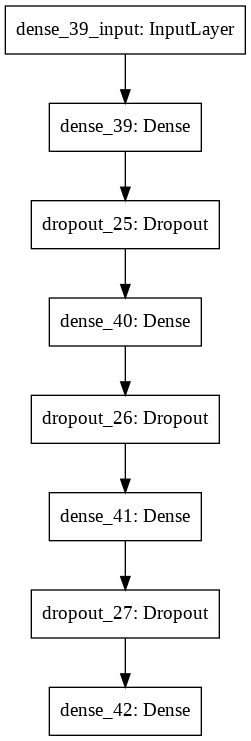

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
import matplotlib.pyplot as plt

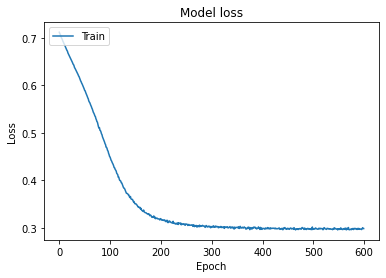

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [216]:
from pandas import DataFrame as df
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
# from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def make_dataframe(text_file):
    id_lines = {}
    text_file = open(text_file, "r", encoding="ISO-8859-1")
    for line in text_file:
        fields = line.split(" +++$+++ ")
        if fields[2] not in id_lines:
            id_lines[fields[2]] = ''
        id_lines[fields[2]] = id_lines[fields[2]] + fields[4]
    # print(len(list(id_lines.values())))
    data = {'id': list(id_lines.keys()), 'scripts': list(id_lines.values())}
    # text_df = df(data = [list(id_lines.keys()), id_lines.values()])
    text_df = df(data)
    return text_df

In [248]:
practice_script = files.upload()

Saving train_scripts.txt to train_scripts (1).txt


In [251]:
# print(type(practice_script.txt))
text_df = make_dataframe("train_scripts (1).txt")
# print(text_df.info)
text_df.info()
text_df = text_df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       432 non-null    object
 1   scripts  432 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
text_df['scripts'] = text_df['scripts'].apply(clean_text)
text_df['scripts'] = text_df['scripts'].str.replace('\d+', '')

In [0]:
max_words = 50000
max_seq_len = 1000
embedding_dim = 100

In [242]:
tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(text_df['scripts'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 7243 unique tokens


In [288]:
X = tokenizer.texts_to_sequences(text_df['scripts'].values)
X = pad_sequences(X, maxlen = max_seq_len)
print(X.shape)

(432, 1000)


In [289]:
print(y.shape)

(432, 24)


In [0]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
# model.add(Attention()(name = 'attention_layer')([]))
# model.add(LSTM(44, dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(24, activation='sigmoid'))

# sgd = SGD(lr = lr, decay = lr_decay, momentum = mom)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
num_epochs = 50
batch_size = 12

In [324]:
history = model.fit(X, y, epochs = num_epochs, batch_size = batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
432/432 [==============================] - 30s 69ms/step - loss: 8.7817 - accuracy: 0.1690
Epoch 2/50
432/432 [==============================] - 30s 70ms/step - loss: 7.9263 - accuracy: 0.2037
Epoch 3/50
432/432 [==============================] - 30s 70ms/step - loss: 7.8452 - accuracy: 0.2014
Epoch 4/50
432/432 [==============================] - 30s 69ms/step - loss: 7.8460 - accuracy: 0.2014
Epoch 5/50
432/432 [==============================] - 31s 71ms/step - loss: 7.8656 - accuracy: 0.2014
Epoch 6/50
432/432 [==============================] - 30s 69ms/step - loss: 7.8101 - accuracy: 0.2060
Epoch 7/50
432/432 [==============================] - 30s 70ms/step - loss: 7.7511 - accuracy: 0.2106
Epoch 8/50
432/432 [==============================] - 30s 70ms/step - loss: 7.6980 - accuracy: 0.2106
Epoch 9/50
432/432 [==============================] - 31s 71ms/step - loss: 7.6296 - accuracy: 0.2106
Epoch 10/50
432/432 [==============================] - 31s 71ms/step - loss: 7.497

In [337]:
preds = model.predict(X)
genres = list(genre_idx.keys())
sorted_pred = [i for _,i in sorted(zip(preds[12], genres), reverse = True)]
print(sorted_pred)
correct_gen = []
for i in range(len(y[0])):
  if y[12][i] == 1:
    correct_gen.append(genres[i])
print(correct_gen)

preds[preds >= 0.50] = 1
preds[preds < 0.50] = 0
print(preds[14])
if (preds[0] == preds[5]).all():
  print("Whyyyyyy")
print(y[14])

['drama', 'biography', 'music', 'comedy', 'romance', 'history', 'thriller', 'crime', 'mystery', 'documentary', 'musical', 'war', 'horror', 'family', 'sport', 'adult', 'western', 'filmnoir', 'animation', 'fantasy', 'short', 'scifi', 'action', 'adventure']
['biography', 'drama', 'music']
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


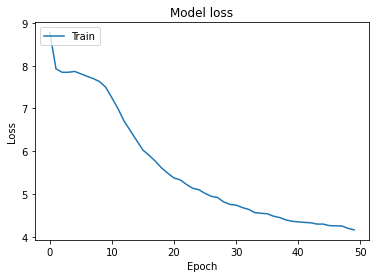

In [331]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

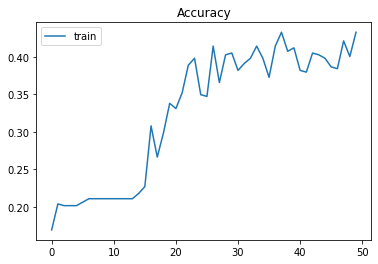

In [333]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

In [277]:
for i, p in enumerate(preds[0]):
  print(i, p)

0 0.50324166
1 0.0057459474
2 0.3281529
3 0.04828462
4 0.08530855
5 0.52131265
6 0.5450674
7 0.010817409
8 0.99463165
9 0.06462282
10 0.26876092
11 0.015551388
12 0.067121
13 0.3290327
14 0.04785475
15 0.03907919
16 0.37567335
17 0.44590178
18 0.2997863
19 0.0110602975
20 0.028788447
21 0.985374
22 0.08433205
23 0.030789107


In [278]:
print(sorted(preds[0], reverse=True))

[0.99463165, 0.985374, 0.5450674, 0.52131265, 0.50324166, 0.44590178, 0.37567335, 0.3290327, 0.3281529, 0.2997863, 0.26876092, 0.08530855, 0.08433205, 0.067121, 0.06462282, 0.04828462, 0.04785475, 0.03907919, 0.030789107, 0.028788447, 0.015551388, 0.0110602975, 0.010817409, 0.0057459474]


In [279]:
for i, g in enumerate(genres):
  print(i, g)

0 action
1 adult
2 adventure
3 animation
4 biography
5 comedy
6 crime
7 documentary
8 drama
9 family
10 fantasy
11 filmnoir
12 history
13 horror
14 music
15 musical
16 mystery
17 romance
18 scifi
19 short
20 sport
21 thriller
22 war
23 western
